# Setup Environment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # !unzip path_to_file.zip -d path_to_directory
# !unzip '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06.zip' -d '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/'

Archive:  /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06.zip
   creating: /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06/
  inflating: /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/__MACOSX/._ML_HW06  
  inflating: /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06/.DS_Store  
  inflating: /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/__MACOSX/ML_HW06/._.DS_Store  
  inflating: /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06/ML_HW06_Spec.pdf  
  inflating: /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/__MACOSX/ML_HW06/._ML_HW06_Spec.pdf  
  inflating: /content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06/image

# Spectral_clustering

In [2]:
from PIL import Image, ImageColor
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

num = 100
epochs = 15
gamma_c = 1 / (255*255)
gamma_s = 1 / (100*100)

def read_input(filename):loadfile
    img = Image.open(filename)
    width, height = img.size
    pixel = np.array(img.getdata()).reshape((width*height, 3))
 
    coord = np.array([]).reshape(0, 2)
    for i in range(num):
        row_x = np.full(num, i)
        row_y = np.arange(num)
        row = np.array(list(zip(row_x, row_y))).reshape(1*num, 2)
        coord = np.vstack([coord, row])

    return pixel, coord

def compute_kernel(color, coord):
    length = len(color)
    gram_matrix = np.zeros((length, length))
    spatial_sq_dists = squareform(pdist(coord, 'sqeuclidean'))
    spatial_rbf = np.exp(-gamma_s*spatial_sq_dists)
    color_sq_dists = squareform(pdist(color, 'sqeuclidean'))
    color_rbf = np.exp(-gamma_c*color_sq_dists)
    kernel = spatial_rbf * color_rbf

    return kernel

def initial_data(data, initial_method):
    prev_classification = np.random.randint(K, size=data.shape[0])
    if initial_method == 'random':
        C_x = np.random.randint(0, num, size=K)
        C_y = np.random.randint(0, num, size=K)
        mu = np.array([])
        if K == 3:
            C_z = np.random.randint(0, num, size=K)
            mu = np.array(list(zip(C_x, C_y, C_z)), dtype=np.float32)
        elif K == 4:
            C_z = np.random.randint(0, num, size=K)
            C_w = np.random.randint(0, num, size=K)
            mu = np.array(list(zip(C_x, C_y, C_z, C_w)), dtype=np.float32)
        else:
            mu = np.array(list(zip(C_x, C_y)), dtype=np.float32)
        return mu, prev_classification
    elif initial_method == 'random-from-data':
        candidate = np.random.randint(low=0, high=data.shape[0], size=K)
        mu = np.zeros([K, K], dtype=np.float32)
        for i in range(K):
            mu[i, :] = data[candidate[i], :]
        return mu, prev_classification
    elif initial_method == 'Kmeans++':
        mu = np.zeros([K, K], dtype=np.float32)
        first_cluster = np.random.randint(low=0, high=data.shape[0], size=1, dtype=np.int)
        mu[0, :] = data[first_cluster, :]
        for i in range(1,K):
            distance = np.zeros(data.shape[0], dtype=np.float32)
            for j in range(0, data.shape[0]):
                distance[j] = np.linalg.norm(data[j, :] - mu[0, :])
            distance = distance / distance.sum()
            candidate = np.random.choice(data.shape[0], 1, p=distance)
            mu[i, :] = data[candidate, :]
        return mu, prev_classification
    
def classify(data, mu):
    classification = np.zeros(data.shape[0], dtype=np.int)
    for dataidx in range(data.shape[0]):
        distance = np.zeros(mu.shape[0], dtype=np.float)
        for cluster in range(mu.shape[0]):
            delta = abs(np.subtract(data[dataidx, :], mu[cluster, :]))
            distance[cluster] = np.square(delta).sum(axis=0)
        classification[dataidx] = np.argmin(distance)

    return classification

def calculate_error(classification, prev_classification):
    error = 0
    for i in range(classification.shape[0]):
        error += np.absolute(classification[i] - prev_classification[i])

    return error

def visualization(filename, storename, iteration, classification, initial_method):
    img = Image.open(filename)
    width, height = img.size
    pixel = img.load()
    # color = [(0,0,0), (100, 0, 0), (0, 255, 0), (255,255,255)]
    color = [ImageColor.getrgb('darkorange'), ImageColor.getrgb('navy'), ImageColor.getrgb('Brown'), ImageColor.getrgb('greenyellow'), 
             ImageColor.getrgb('purple'), ImageColor.getrgb('silver'), ImageColor.getrgb('gold'), ImageColor.getrgb('MediumAquamarine'),
             ImageColor.getrgb('black'), ImageColor.getrgb('magenta'), ImageColor.getrgb('peru'), ImageColor.getrgb('green'),
             ImageColor.getrgb('yellow'), ImageColor.getrgb('pink'), ImageColor.getrgb('red') #cyan, dodgerblue, cornflowerblue
             ]    
    for i in range(img.size[0]):
        for j in range(img.size[1]):
            pixel[j, i] = color[classification[i * num + j]]
    img.save(storename + '_' + initial_method + '_' + str(gamma_c) + '_' + str(gamma_s) + '_' + str(iteration) + '_'+ str(K) + '.png')

def draw_eigenspace(storename, classification, initial_method, data):
    color = iter(plt.cm.rainbow(np.linspace(0, 1, K)))
    plt.clf()
    title = "Spectral-Clustering in Eigen-Space"
    plt.suptitle(title)
    for cluster in range(K):
        col = next(color)
        for j in range(0, data.shape[0]):
            if classification[j] == cluster:
                plt.scatter(data[j][0], data[j][1], s=8, c=[col])
    plt.savefig(storename + '_initial_method' + initial_method + '_gamma_c' + str(gamma_c) + '_gamma_s' + str(gamma_s) + '_' + 'eigenspace' + '_'+ str(K) + '.png')

def update(data, mu, classification):
    new_mu = np.zeros(mu.shape, dtype=np.float32)
    count = np.zeros(mu.shape, dtype=np.int)
    one = np.ones(mu.shape[1], dtype=np.int)
    for dataidx in range(data.shape[0]):
        new_mu[classification[dataidx]] += data[dataidx]
        count[classification[dataidx]] += one
    for i in range(new_mu.shape[0]):
        if count[i][0] == 0:
            count[i] += one
    
    return np.true_divide(new_mu, count)

def K_Means(data, filename, storename):
    method = ['random', 'random-from-data', 'Kmeans++']
    for initial_method in method:
        print("Initial method: {}".format(initial_method))
        mu, classification = initial_data(data, initial_method)
        iteration = 0
        error = -10000
        prev_error = -10001
        print("mu = {}".format(mu))

        while(iteration <= epochs):
            iteration += 1
            print("iteration = {}".format(iteration))
            print("current mu = {}".format(mu))
            prev_classification = classification
            visualization(filename, storename, iteration, classification, initial_method)
            classification = classify(data, mu)
            error = calculate_error(classification, prev_classification)
            print("error = {}".format(error))
            if error == prev_error:
                break
            prev_error = error
            mu = update(data, mu, classification)
        
        draw_eigenspace(storename, classification, initial_method, data)
        # draw_eigenspace(filename, storename, iteration, classification, initial_method, data)

def normalized_cut(pixel, coord):
    weight = compute_kernel(pixel, coord) #W
    degree = np.diag(np.sum(weight, axis=1)) #D

    degree_square = np.diag(np.power(np.diag(degree), -0.5))
    L_sym = np.eye(weight.shape[0]) - degree_square @ weight @ degree_square #L
    eigen_values, eigen_vectors = np.linalg.eig(L_sym)
    idx = np.argsort(eigen_values)[1: K+1]
    U = eigen_vectors[:, idx].real.astype(np.float32)

    # normalized
    sum_over_row = (np.sum(np.power(U, 2), axis=1) ** 0.5).reshape(-1, 1)
    T = U.copy()
    for i in range(sum_over_row.shape[0]):
        if sum_over_row[i][0] == 0:
            sum_over_row[i][0] = 1
        T[i][0] /= sum_over_row[i][0]
        T[i][1] /= sum_over_row[i][0]
    
    return T

def ratio_cut(pixel, coord):
    weight = compute_kernel(pixel, coord) #W
    degree = np.diag(np.sum(weight, axis=1)) #D
    L = degree - weight # L = D-W

    eigen_values, eigen_vectors = np.linalg.eig(L)
    idx = np.argsort(eigen_values)[1: K+1]
    U = eigen_vectors[:, idx].real.astype(np.float32)

    return U

In [3]:
img1 = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06/image1.png'
img2 = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/ML_HW06/image2.png'
storename1 = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/visualization/01_wywyWang/spectral_Kmeans/image1_s/k4/image1_sp_normalized_cut'
storename1_1 = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/visualization/01_wywyWang/spectral_Kmeans/image1_s/k4/image1_sp_ratio_cut'
storename2 = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/visualization/01_wywyWang/spectral_Kmeans/image2_s/k4/image2_sp_normalized_cut'
storename2_1 = '/content/drive/MyDrive/01_GMBA/3rd_semester(2022)/01-2_PM & 04-1_Machine Learning/HW6_1218/visualization/01_wywyWang/spectral_Kmeans/image2_s/k4/image2_sp_ratio_cut'

Initial method: random
mu = [[79. 74.]
 [29. 96.]]
iteration = 1
current mu = [[79. 74.]
 [29. 96.]]


<ipython-input-2-4c781cdc4022>:73: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  classification = np.zeros(data.shape[0], dtype=np.int)
<ipython-input-2-4c781cdc4022>:75: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dista

error = 5029
iteration = 2
current mu = [[ 0.          0.        ]
 [-0.05723425 -0.06478607]]
error = 5026
iteration = 3
current mu = [[ 0.52871217  0.27567127]
 [-0.64930554 -0.40880128]]
error = 551
iteration = 4
current mu = [[ 0.61105672  0.1971498 ]
 [-0.71045974 -0.3208151 ]]
error = 198
iteration = 5
current mu = [[ 0.64298454  0.1653675 ]
 [-0.71481828 -0.28092417]]
error = 46
iteration = 6
current mu = [[ 0.64910255  0.15717993]
 [-0.71527252 -0.27157237]]
error = 10
iteration = 7
current mu = [[ 0.65002864  0.1552801 ]
 [-0.71560761 -0.26963831]]
error = 2
iteration = 8
current mu = [[ 0.65044114  0.15495484]
 [-0.71546412 -0.26917173]]
error = 0
iteration = 9
current mu = [[ 0.65044114  0.15495484]
 [-0.71546412 -0.26917173]]
error = 0
Initial method: random-from-data
mu = [[-0.11815069  0.9929957 ]
 [-0.58792824  0.8089131 ]]
iteration = 1
current mu = [[-0.11815069  0.9929957 ]
 [-0.58792824  0.8089131 ]]
error = 4976
iteration = 2
current mu = [[ 0.65219346  0.16843642]


<ipython-input-2-4c781cdc4022>:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  first_cluster = np.random.randint(low=0, high=data.shape[0], size=1, dtype=np.int)


error = 5049
iteration = 2
current mu = [[ 0.57725022  0.24693205]
 [-0.67050647 -0.36608078]]
error = 404
iteration = 3
current mu = [[ 0.63323008  0.18291158]
 [-0.70878033 -0.29852016]]
error = 118
iteration = 4
current mu = [[ 0.64690599  0.16172907]
 [-0.71427783 -0.27614874]]
error = 30
iteration = 5
current mu = [[ 0.64948711  0.15599844]
 [-0.71563073 -0.27047164]]
error = 5
iteration = 6
current mu = [[ 0.65023502  0.15511756]
 [-0.71553602 -0.26940503]]
error = 1
iteration = 7
current mu = [[ 0.65044114  0.15495484]
 [-0.71546412 -0.26917173]]
error = 0
iteration = 8
current mu = [[ 0.65044114  0.15495484]
 [-0.71546412 -0.26917173]]
error = 0
Initial method: random
mu = [[81. 63.]
 [ 9. 22.]]
iteration = 1
current mu = [[81. 63.]
 [ 9. 22.]]
error = 5029
iteration = 2
current mu = [[0.         0.        ]
 [0.0498511  0.04727904]]
error = 4126
iteration = 3
current mu = [[-0.47399317 -0.50443205]
 [ 0.41780857  0.43481071]]
error = 217
iteration = 4
current mu = [[-0.4845362

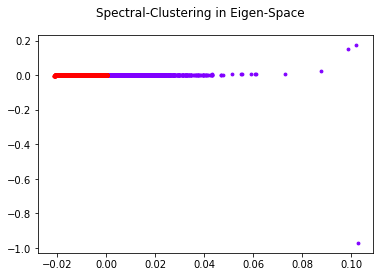

In [4]:
K = 2
filename = img1
storename = storename1
pixel1, coord1 = read_input(filename)
T = normalized_cut(pixel1, coord1)
K_Means(T, filename, storename)

filename = img2
storename = storename2
pixel2, coord2 = read_input(filename)
T = normalized_cut(pixel2, coord2)
K_Means(T, filename, storename)

#___________________________________________________________
print("===================================================")

filename = img1
storename = storename1_1
pixel1, coord1 = read_input(filename)
U = ratio_cut(pixel1, coord1)
K_Means(U, filename, storename)

filename = img2
storename = storename2_1
pixel2, coord2 = read_input(filename)
U = ratio_cut(pixel2, coord2)
K_Means(U, filename, storename)

Initial method: random
mu = [[77. 33. 69.]
 [ 2. 49.  4.]
 [33. 15. 15.]]
iteration = 1
current mu = [[77. 33. 69.]
 [ 2. 49.  4.]
 [33. 15. 15.]]


<ipython-input-2-4c781cdc4022>:73: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  classification = np.zeros(data.shape[0], dtype=np.int)
<ipython-input-2-4c781cdc4022>:75: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dista

error = 10035
iteration = 2
current mu = [[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [-0.04476925 -0.03663229  0.00014972]]


<ipython-input-2-4c781cdc4022>:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  count = np.zeros(mu.shape, dtype=np.int)
<ipython-input-2-4c781cdc4022>:120: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

error = 9958
iteration = 3
current mu = [[ 0.46838636  0.21455411 -0.00089255]
 [ 0.          0.          0.        ]
 [-0.55363309 -0.28571688  0.00118327]]
error = 1207
iteration = 4
current mu = [[ 5.75366062e-01  1.69392099e-01  6.88847077e-05]
 [-1.19153166e-01  2.07895211e-01 -4.03791671e-03]
 [-6.04627445e-01 -2.94131413e-01  1.33736488e-03]]
error = 1771
iteration = 5
current mu = [[ 7.37682637e-01 -1.07657591e-01  6.95645792e-04]
 [-2.37255642e-01  7.11232530e-01 -3.03300116e-03]
 [-5.75801649e-01 -3.71769337e-01  1.37914498e-03]]
error = 397
iteration = 6
current mu = [[ 7.36598550e-01 -1.33749184e-01  7.21962315e-04]
 [-2.56885550e-01  7.52764703e-01 -3.15563117e-03]
 [-5.62107784e-01 -3.81296763e-01  1.45915791e-03]]
error = 12
iteration = 7
current mu = [[ 7.35995881e-01 -1.34670852e-01  7.20175453e-04]
 [-2.56945336e-01  7.53872725e-01 -3.16902884e-03]
 [-5.62519854e-01 -3.80313449e-01  1.46413570e-03]]
error = 4
iteration = 8
current mu = [[ 7.35664377e-01 -1.34976048e-0

<ipython-input-2-4c781cdc4022>:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  first_cluster = np.random.randint(low=0, high=data.shape[0], size=1, dtype=np.int)


error = 8289
iteration = 2
current mu = [[ 1.91863943e-01  7.55520126e-01 -2.19661146e-03]
 [-5.61282349e-01 -2.11004130e-01  7.88904862e-04]
 [ 7.29519658e-01 -1.85472206e-01  3.74262241e-04]]
error = 1303
iteration = 3
current mu = [[-1.05528043e-01  8.51266243e-01 -3.92963489e-03]
 [-5.84729477e-01 -2.79966025e-01  1.22301351e-03]
 [ 7.28268251e-01 -1.49985839e-01  7.31935839e-04]]
error = 330
iteration = 4
current mu = [[-1.88968410e-01  8.09725769e-01 -3.40556363e-03]
 [-5.76210432e-01 -3.32432967e-01  1.27661067e-03]
 [ 7.31652565e-01 -1.41796240e-01  7.42275822e-04]]
error = 172
iteration = 5
current mu = [[-2.24971688e-01  7.80891897e-01 -3.34525341e-03]
 [-5.70385514e-01 -3.57908932e-01  1.40099540e-03]
 [ 7.33801481e-01 -1.37986658e-01  7.37961041e-04]]
error = 80
iteration = 6
current mu = [[-2.43159109e-01  7.67828595e-01 -3.23659133e-03]
 [-5.66082968e-01 -3.69417675e-01  1.43050276e-03]
 [ 7.34724791e-01 -1.36428272e-01  7.19993350e-04]]
error = 41
iteration = 7
current m

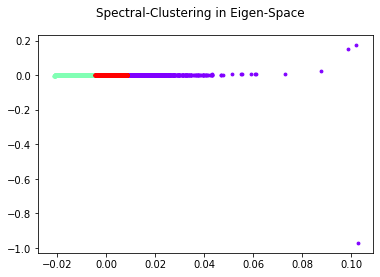

In [5]:
K = 3
filename = img1
storename = storename1
pixel1, coord1 = read_input(filename)
T = normalized_cut(pixel1, coord1)
K_Means(T, filename, storename)

filename = img2
storename = storename2
pixel2, coord2 = read_input(filename)
T = normalized_cut(pixel2, coord2)
K_Means(T, filename, storename)

#___________________________________________________________
print("===================================================")

filename = img1
storename = storename1_1
pixel1, coord1 = read_input(filename)
U = ratio_cut(pixel1, coord1)
K_Means(U, filename, storename)

filename = img2
storename = storename2_1
pixel2, coord2 = read_input(filename)
U = ratio_cut(pixel2, coord2)
K_Means(U, filename, storename)

Initial method: random
mu = [[88. 37. 12.  3.]
 [11.  0. 77. 61.]
 [90. 70. 34. 32.]
 [27. 25. 63. 43.]]
iteration = 1
current mu = [[88. 37. 12.  3.]
 [11.  0. 77. 61.]
 [90. 70. 34. 32.]
 [27. 25. 63. 43.]]


<ipython-input-2-4c781cdc4022>:73: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  classification = np.zeros(data.shape[0], dtype=np.int)
<ipython-input-2-4c781cdc4022>:75: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dista

error = 14957
iteration = 2
current mu = [[ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.01722047 -0.02898875  0.00014972  0.00020164]]


<ipython-input-2-4c781cdc4022>:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  count = np.zeros(mu.shape, dtype=np.int)
<ipython-input-2-4c781cdc4022>:120: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.2

error = 14832
iteration = 3
current mu = [[ 0.34835104  0.25905009 -0.00043334 -0.00055688]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-0.37469504 -0.31064705  0.00071986  0.00094336]]
error = 2527
iteration = 4
current mu = [[ 4.99955157e-01  2.07095088e-01  3.21399505e-04  1.18511664e-03]
 [-8.00819142e-02  6.83471547e-02 -4.01169070e-03 -3.79873248e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.00552565e-01 -2.93381996e-01  1.42686588e-03  6.29951143e-04]]
error = 2228
iteration = 5
current mu = [[ 6.80000912e-01 -2.36113576e-02  1.14184312e-03 -2.22808597e-03]
 [-2.54034235e-01  6.02292497e-01 -2.73551867e-03  1.84832086e-03]
 [ 1.84117312e-01 -4.15435485e-01 -4.49716149e-03  6.83783609e-03]
 [-5.23989371e-01 -3.05361627e-01  1.51196440e-03  4.22959608e-04]]
error = 1603
iteration = 6
current mu = [[ 0.73703978 -0.05792323  0.00229233 -0.00351217]
 [-0.20673808  0.64098897 -0.00312956  0.0026

<ipython-input-2-4c781cdc4022>:61: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  first_cluster = np.random.randint(low=0, high=data.shape[0], size=1, dtype=np.int)


error = 12862
iteration = 2
current mu = [[ 6.05209458e-01  1.98027537e-02 -3.17388358e-04 -1.01611749e-03]
 [-7.06727390e-01 -3.02161183e-01  4.55042469e-03 -2.16741973e-03]
 [-4.21648608e-01  3.08001814e-01  2.07648166e-03 -3.76796663e-03]
 [-2.86222410e-01 -5.71478117e-01 -4.48676958e-03  1.08948319e-02]]
error = 2484
iteration = 3
current mu = [[ 6.89861425e-01 -9.70154876e-02  6.40505571e-04 -2.82745617e-03]
 [-6.73897039e-01 -2.44257569e-01  5.10808530e-03 -3.87487268e-03]
 [-2.96662926e-01  5.04362632e-01 -1.02394509e-03 -4.29798219e-04]
 [-2.16994655e-01 -5.54862569e-01 -4.38982815e-03  1.18592422e-02]]
error = 903
iteration = 4
current mu = [[ 0.70076147 -0.11393646  0.00082467 -0.00287673]
 [-0.6430073  -0.17695262  0.00521484 -0.00535319]
 [-0.21456736  0.61918991 -0.00306507  0.00206378]
 [-0.20619142 -0.54952678 -0.00430325  0.01201625]]
error = 416
iteration = 5
current mu = [[ 0.70109098 -0.11432899  0.00082042 -0.00288958]
 [-0.6328158  -0.13073236  0.00496076 -0.006064

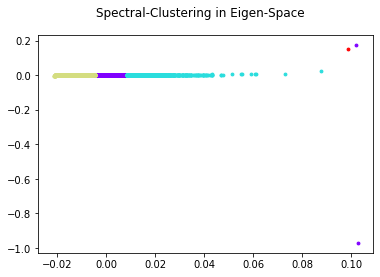

In [4]:
# K4 new
K = 4
filename = img1
storename = storename1
pixel1, coord1 = read_input(filename)
T = normalized_cut(pixel1, coord1)
K_Means(T, filename, storename)

filename = img2
storename = storename2
pixel2, coord2 = read_input(filename)
T = normalized_cut(pixel2, coord2)
K_Means(T, filename, storename)

#___________________________________________________________
print("===================================================")

filename = img1
storename = storename1_1
pixel1, coord1 = read_input(filename)
U = ratio_cut(pixel1, coord1)
K_Means(U, filename, storename)

filename = img2
storename = storename2_1
pixel2, coord2 = read_input(filename)
U = ratio_cut(pixel2, coord2)
K_Means(U, filename, storename)